# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [10]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import tensorflow as tf
from PIL import Image

%matplotlib inline

In [11]:
dataset = get_dataset("/app/project/data/processed/processed/class/*.tfrecord")


INFO:tensorflow:Reading unweighted datasets: ['/app/project/data/processed/processed/class/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/app/project/data/processed/processed/class/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 100


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [4]:
print(type(dataset))
print(dataset)

<class 'tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter'>
<DatasetV1Adapter shapes: {image: (None, None, 3), source_id: (), key: (), filename: (), groundtruth_image_confidences: (None,), groundtruth_verified_neg_classes: (None,), groundtruth_not_exhaustive_classes: (None,), groundtruth_boxes: (None, 4), groundtruth_area: (None,), groundtruth_is_crowd: (None,), groundtruth_difficult: (None,), groundtruth_group_of: (None,), groundtruth_weights: (None,), groundtruth_classes: (None,), groundtruth_image_classes: (None,), original_image_spatial_shape: (2,)}, types: {image: tf.uint8, source_id: tf.string, key: tf.string, filename: tf.string, groundtruth_image_confidences: tf.float32, groundtruth_verified_neg_classes: tf.int64, groundtruth_not_exhaustive_classes: tf.int64, groundtruth_boxes: tf.float32, groundtruth_area: tf.float32, groundtruth_is_crowd: tf.bool, groundtruth_difficult: tf.int64, groundtruth_group_of: tf.bool, groundtruth_weights: tf.float32, groundtruth_classes: tf.int

In [9]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # ADD CODE HERE
    
    # batch 는 이미지를 뜻함.
    # 다음 코드에서 image 10장을 display할 것이므로,
    # display_imstances() 가 10 번 반복되며, 10장의 각기 다른 image가 입력되도록 하면 됨.
    
    # color mapping of classes
    # one-hot encoding
    colormap = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]}

    # Labeling with bounding box in Image
    lablemap = {1: 'vehicle', 2: 'pedestrian', 4:'cyclist'}
    
        
    f, ax = plt.subplots(1)
    
    img = batch['image'].numpy()    
    
    ax.imshow(img)

    bboxes = batch['groundtruth_boxes'].numpy()
    classes = batch['groundtruth_classes'].numpy()
    # print(bboxes)
    
    for bb, cl in zip(bboxes, classes):
        box ={'boxstyle':'square','ec':colormap[cl],'fc':(0.5,0.5,0.5)}
        # 주어진 tfrecord의 bboxes 좌표 값들은 0~1 normalization 되어 있어,
        # 640x640 이미지에 맞게 resizing 해줘야 함
        y1, x1, y2, x2 = (bb * 640).astype(np.int)
        rec = Rectangle((x1, y1), x2 - x1, y2 - y1, facecolor = 'none', edgecolor=colormap[cl])
        plt.text(x1, y1, lablemap[cl],color=colormap[cl], weight='bold',size=5, bbox = box)
        ax.add_patch(rec)
        # ax.axis('off')
        
        
    plt.tight_layout()
    plt.show()




## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

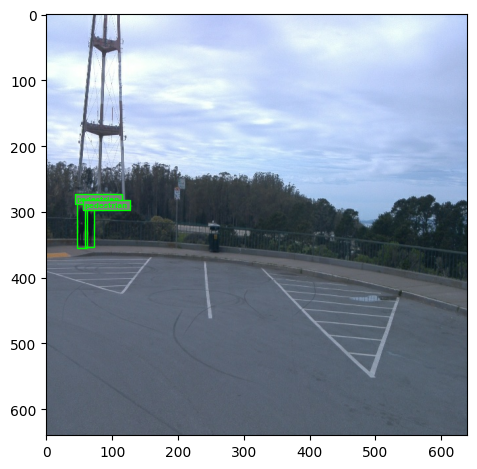

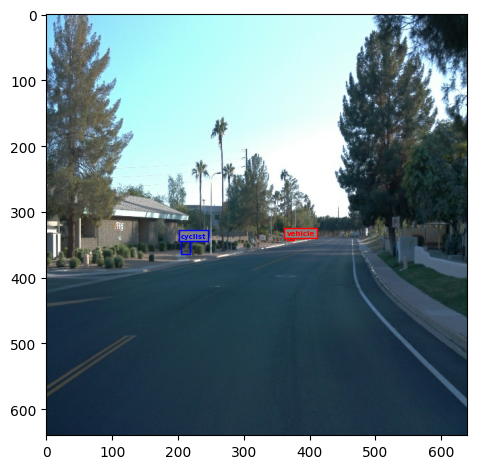

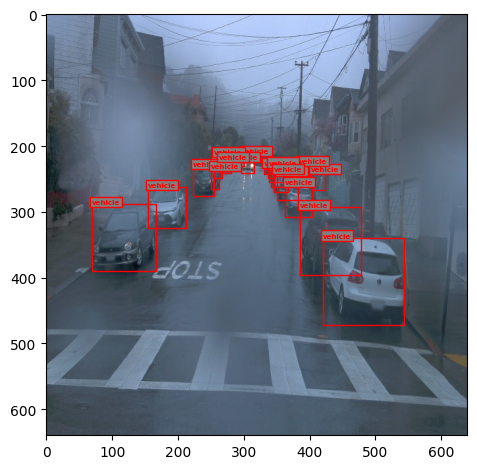

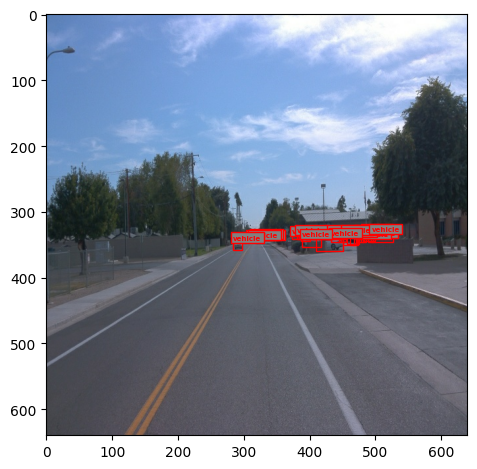

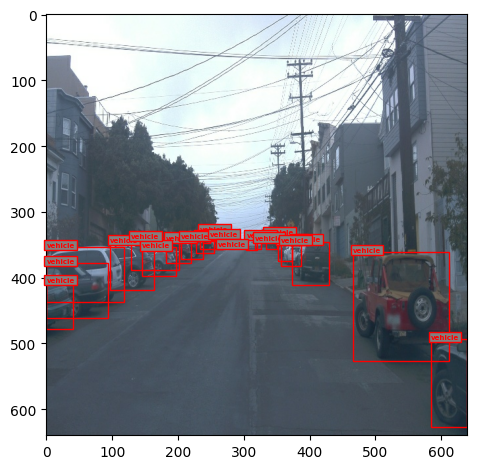

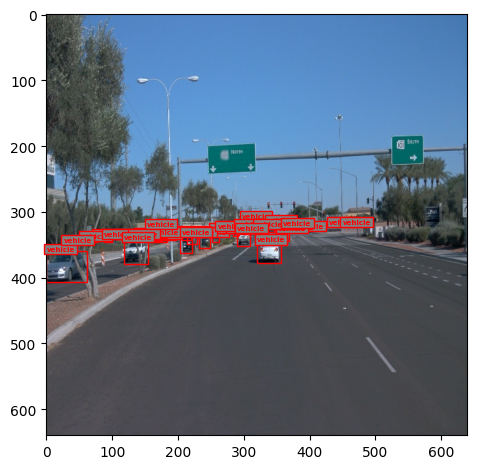

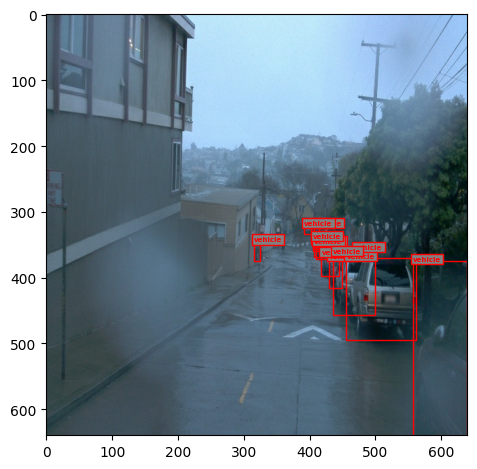

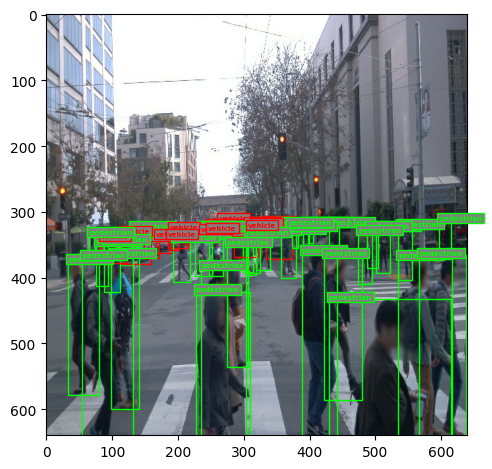

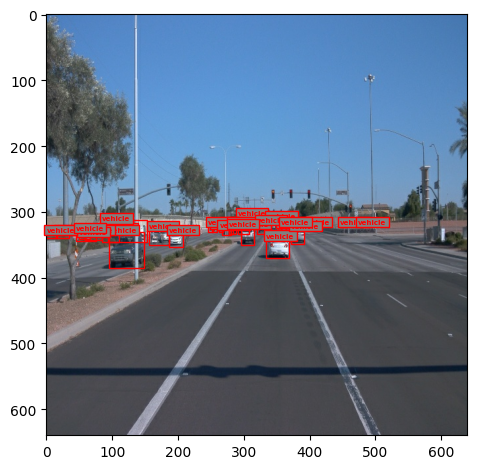

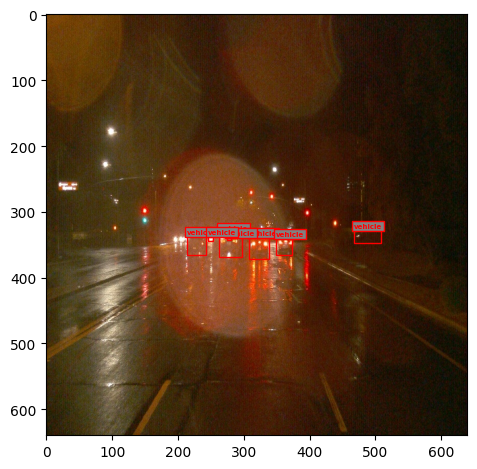

In [12]:
## STUDENT SOLUTION HERE

# Dataset 섞기 위해서는 dataset.shuffle()
#         10개를 얻기 위해, dataset.take() 
# 로 사용가능 (dataset : 우리가 얻은 데이터셋)

# dataset.shuffle(buffer_size) : buffer_size의 값은
# 보유하고 있는 데이터셋의 크기와 같거나 더 큰 값으로.
dataset = dataset.shuffle(200)

# 섞인 데이터셋 중 10장을 take 해오기
dataset10 = dataset.take(10)
# i = 1
# 각각 한장씩 display
for data in dataset10:
    # print(f'Img({i})')
    # i += 1
    display_instances(data)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...